## Objective:
    The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 
## Exploratory Data Analysis (EDA):
    1.Load the Titanic dataset using Python's pandas library.
    2.Check for missing values.
    3.Explore data distributions using histograms and box plots.
    4.Visualize relationships between features and survival using scatter plots and bar plots.
## Data Preprocessing:
    1.Impute missing values.
    2.Encode categorical variables using one-hot encoding or label encoding. 
    3.If needed you can apply more preprocessing methods on the given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import chi2,f_classif
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('Titanic_train.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
df.fillna({'Age':df['Age'].mean(),'Cabin':df['Cabin'].mode,'Embarked':df['Embarked'].mode},inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
target=df[['Survived']]
target

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [8]:
features=df[['Pclass','Name','Sex', 'Age', 'SibSp', 'Parch', 'Ticket','Fare','Embarked']]
features

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [9]:
cat_col=features.select_dtypes(['object','category']).columns
cat_col

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [10]:
cat=features[cat_col]
cat = cat.astype(str)
cat.head()

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S


In [11]:
Ord=OrdinalEncoder()
df2=pd.DataFrame(Ord.fit_transform(cat),columns=cat.columns)
df2.head()

,Name,Sex,Ticket,Embarked
0,108.0,1.0,523.0,3.0
1,190.0,0.0,596.0,1.0
2,353.0,0.0,669.0,3.0
3,272.0,0.0,49.0,3.0
4,15.0,1.0,472.0,3.0


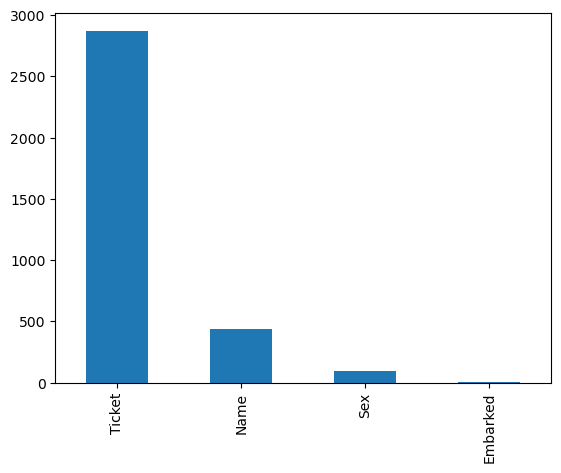

In [12]:
chi=chi2(df2,target)
pd.Series(chi[0],index=df2.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [13]:
df2.drop(columns='Embarked',inplace=True)
df2.head()

,Name,Sex,Ticket
0,108.0,1.0,523.0
1,190.0,0.0,596.0
2,353.0,0.0,669.0
3,272.0,0.0,49.0
4,15.0,1.0,472.0


In [14]:
num_col=features.select_dtypes(['int','float']).columns
num_col

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
num=df[num_col]
num.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


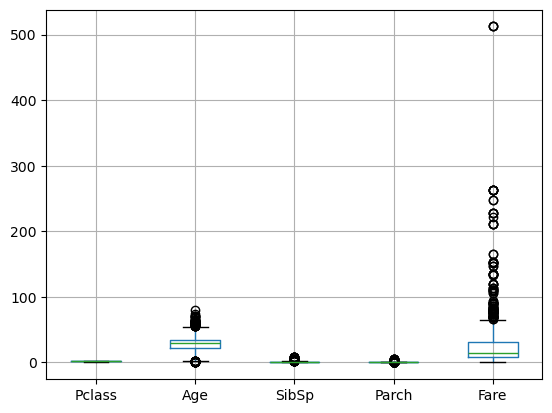

In [16]:
num.boxplot()
plt.show()

In [17]:
def outliercapping(num,col):
    q1=num[col].quantile(0.25)
    q3=num[col].quantile(0.75)
    IQR=q3-q1
    lower=q1 - 1.5*IQR
    upper=q3 + 1.5*IQR
    num[col]=num[col].apply(lambda x:upper if x > upper else lower if x < lower else x)
for col in num.select_dtypes(['int','float']).columns:
    outliercapping(num,col)

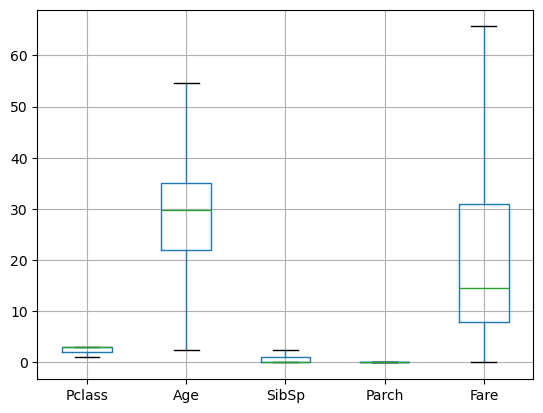

In [18]:
num.boxplot()
plt.show()

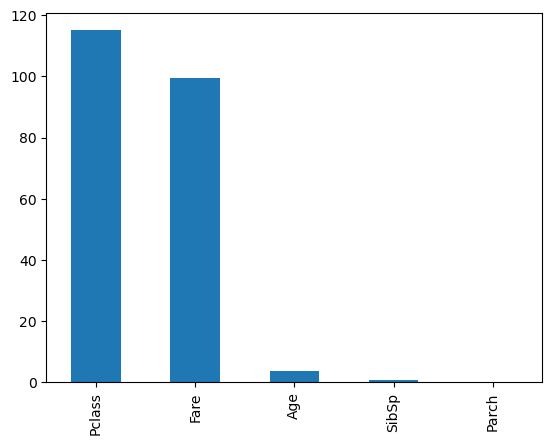

In [19]:
fcls=f_classif(num,target)
pd.Series(fcls[0],index=num.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [20]:
num.drop(columns=['SibSp'],inplace=True)
num.head()

,Pclass,Age,Parch,Fare
PassengerId,,,,
1,3,22.0,0.0,7.2500
2,1,38.0,0.0,65.6344
3,3,26.0,0.0,7.9250
4,1,35.0,0.0,53.1000
5,3,35.0,0.0,8.0500


In [21]:
std=StandardScaler()
num[['Age','Fare']]=std.fit_transform(num[['Age','Fare']])
num.head()

,Pclass,Age,Parch,Fare
PassengerId,,,,
1,3,-0.611917,0.0,-0.820552
2,1,0.715304,0.0,2.031623
3,3,-0.280111,0.0,-0.787578
4,1,0.466450,0.0,1.419297
5,3,0.466450,0.0,-0.781471


In [22]:
features_new=pd.concat([df2,num],axis=1)
features_new

,Name,Sex,Ticket,Pclass,Age,Parch,Fare
0,108.0,1.0,523.0,NaN,NaN,NaN,NaN
1,190.0,0.0,596.0,3.0,-0.611917,0.0,-0.820552
2,353.0,0.0,669.0,1.0,0.715304,0.0,2.031623
3,272.0,0.0,49.0,3.0,-0.280111,0.0,-0.787578
4,15.0,1.0,472.0,1.0,0.466450,0.0,1.419297
...,...,...,...,...,...,...,...
887,303.0,0.0,14.0,2.0,-0.197160,0.0,-0.539655
888,413.0,0.0,675.0,1.0,-0.860771,0.0,0.290823
889,81.0,1.0,8.0,3.0,0.026735,0.0,-0.029155
890,220.0,1.0,466.0,1.0,-0.280111,0.0,0.290823


In [23]:
features_new.fillna({'Pclass':df['Pclass'].mode(),'Age':df['Age'].mean(),'Parch':df['Parch'].mode(),'Fare':df['Fare'].mean()},inplace=True)
features_new.dropna(inplace=True)

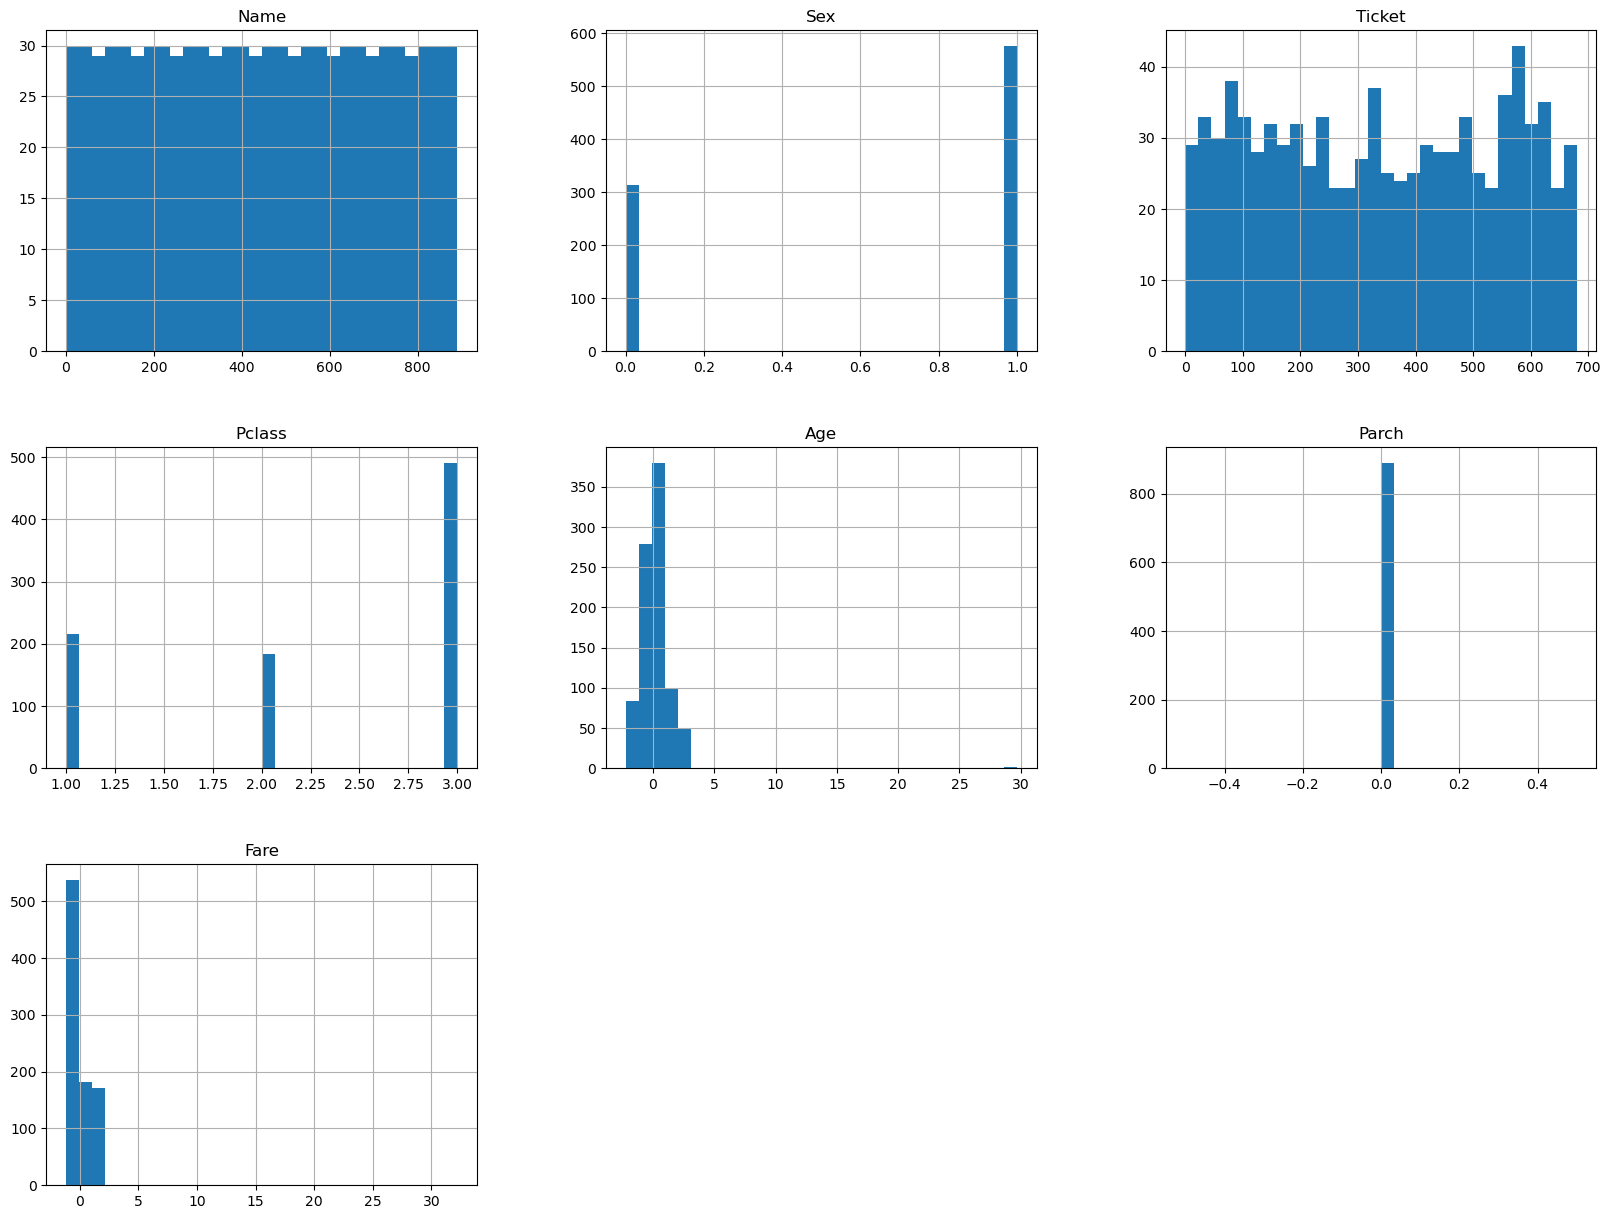

In [24]:
features_new.hist(bins=30, figsize=(20,15))
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

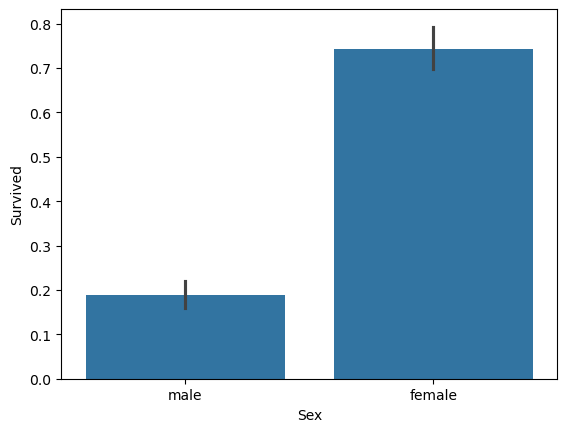

In [25]:
sns.barplot(x='Sex', y='Survived', data=df)

## Building Predictive Models:
    1.Split the preprocessed dataset into training and testing sets.
    2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
    3.Build predictive models using LightGBM and XGBoost algorithms.
    4.Train the models on the training set and evaluate their performance on the testing set.
    5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [26]:
x_train,x_test,y_train,y_test=train_test_split(features_new,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712, 1)
(179, 1)


## Comparative Analysis:
    1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
    2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [51]:
import xgboost as xgb
import lightgbm as lgb

In [28]:
xgb= xgb.XGBClassifier(n_estimators=100,learning_rate=0.5,min_child_weight=2,reg_alpha=5,reg_lambda=10,
                      subsample=0.9,max_depth=3,max_features=1,random_state=50)

In [29]:
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred_xgb))
print("Precision:",precision_score(y_test,y_pred_xgb))
print("Recall",recall_score(y_test,y_pred_xgb))
print("F1_score",f1_score(y_test,y_pred_xgb))

Accuracy: 0.7821229050279329
Precision: 0.78125
Recall 0.6666666666666666
F1_score 0.7194244604316546


In [46]:
lgb= lgb.LGBMClassifier(n_estimators=100,learning_rate=0.5,min_child_weight=2,reg_alpha=5,reg_lambda=10,
                      subsample=0.9,max_depth=3,max_features=1,random_state=50,max_bins=10)
lgb.fit(x_train,y_train)
y_pred_lgb=lgb.predict(x_test)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 267, number of negative: 445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [31]:
print("Accuracy:",accuracy_score(y_test,y_pred_lgb))
print("Precision:",precision_score(y_test,y_pred_lgb))
print("Recall",recall_score(y_test,y_pred_lgb))
print("F1_score",f1_score(y_test,y_pred_lgb))

Accuracy: 0.7877094972067039
Precision: 0.7681159420289855
Recall 0.7066666666666667
F1_score 0.7361111111111112


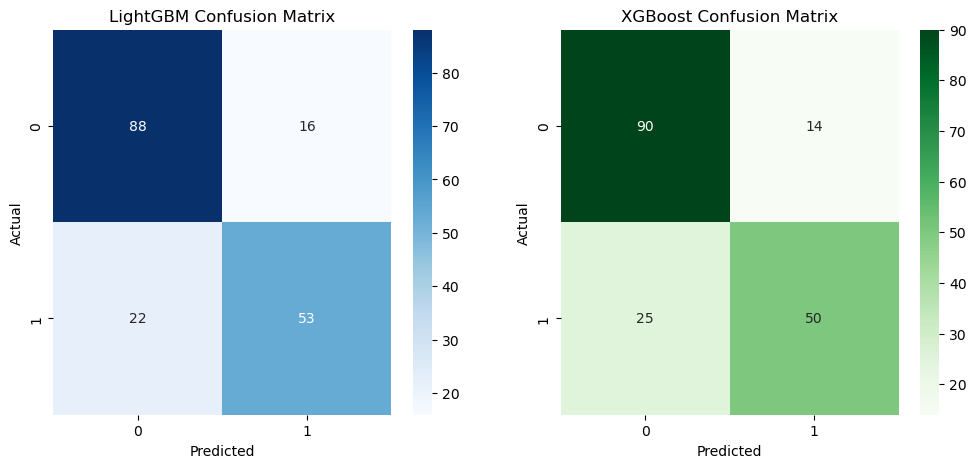

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_lgbm = confusion_matrix(y_test, y_pred_lgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_lgbm, annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title("LightGBM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_xgb, annot=True, fmt="d", ax=axes[1], cmap="Greens")
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.show()


In [33]:
## Cross Validation
kfold= KFold(n_splits=5,shuffle=True)

for train_split , test_split in kfold.split(features_new,target):
    print(train_split,test_split)

[  0   1   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  28  30  31  32  34  35  36  37  39  40  41
  42  43  44  45  46  47  48  50  51  52  53  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  70  71  73  74  75  76  78  80  82  83  84
  85  87  89  90  91  92  95  96  97  99 100 102 103 104 105 106 107 108
 109 111 112 113 115 116 117 118 120 123 124 125 127 128 130 131 132 133
 134 135 136 137 138 140 141 142 143 144 145 146 148 149 150 152 153 155
 156 157 162 163 164 165 166 167 168 169 170 171 172 173 174 175 177 178
 179 181 182 183 184 185 188 189 190 191 192 194 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 222
 223 224 225 226 227 228 232 233 234 235 236 237 238 239 240 241 242 243
 244 246 247 248 249 250 251 252 253 254 255 256 257 259 261 262 264 265
 266 267 268 269 270 271 272 273 274 275 276 278 279 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 296 297 298 29

In [34]:

cross_val_score(xgb,features_new,target,scoring='accuracy',cv=kfold).mean()

np.float64(0.7822986629841191)

In [35]:
print(cross_val_score(lgb,features_new,target,scoring='accuracy',cv=kfold).mean())

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 276, number of negative: 436
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.387640 -> initscore=-0.457241
[LightGBM] [Info] Start training from score -0.457241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [34]:
## Hyperparameter Turning for XGBoost
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(xgb, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(features_new, target)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.7979599522942691


In [38]:
xgbb= xgb.XGBClassifier(n_estimators=200,learning_rate=0.2,min_child_weight=2,reg_alpha=5,reg_lambda=10,
                      subsample=0.8,max_depth=5,max_features=1,random_state=50)
xgbb.fit(x_train,y_train)
y_pred_xgb=xgbb.predict(x_test)

In [39]:
print("Accuracy:",accuracy_score(y_test,y_pred_xgb))
print("Precision:",precision_score(y_test,y_pred_xgb))
print("Recall",recall_score(y_test,y_pred_xgb))
print("F1_score",f1_score(y_test,y_pred_xgb))

Accuracy: 0.7877094972067039
Precision: 0.7936507936507936
Recall 0.6666666666666666
F1_score 0.7246376811594203


Text(50.722222222222214, 0.5, 'Actual')

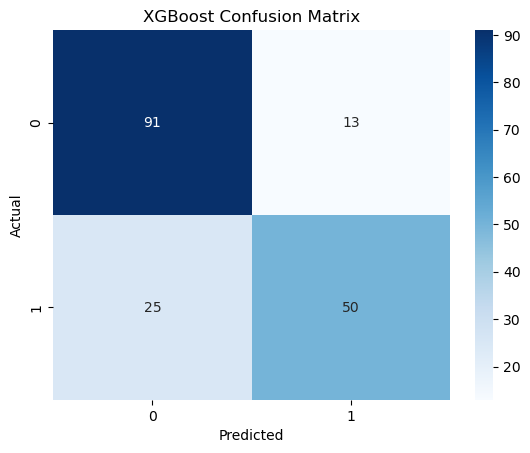

In [47]:
cm_xgbm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_xgbm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [49]:
## Hyperparameter Turning for LGBM
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(lgb, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(features_new, target)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [52]:
lgb= lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1,min_child_weight=2,reg_alpha=5,reg_lambda=10,
                      subsample=0.8,max_depth=3,max_features=1,random_state=50,max_bins=10)
lgb.fit(x_train,y_train)
y_pred_lgb=lgb.predict(x_test)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 267, number of negative: 445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [53]:
print("Accuracy:",accuracy_score(y_test,y_pred_lgb))
print("Precision:",precision_score(y_test,y_pred_lgb))
print("Recall",recall_score(y_test,y_pred_lgb))
print("F1_score",f1_score(y_test,y_pred_lgb))

Accuracy: 0.7877094972067039
Precision: 0.7681159420289855
Recall 0.7066666666666667
F1_score 0.7361111111111112


Text(50.722222222222214, 0.5, 'Actual')

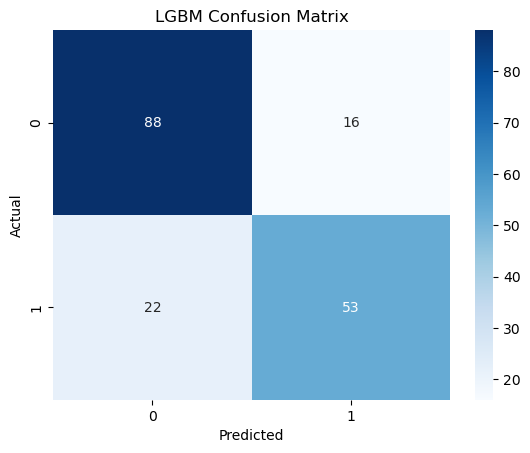

In [55]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgb)

sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues")
plt.title("LGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Testing Data

In [35]:
test=pd.read_csv('Titanic_test.csv',index_col='PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [37]:
test.drop(columns='Cabin',inplace=True)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [38]:
test.fillna({'Age':test['Age'].mean(),'Fare':test['Fare'].mean()},inplace=True)
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [39]:
test.duplicated().sum()

np.int64(0)

In [40]:
cat_col=test.select_dtypes(['object','category']).columns
cat_col

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [41]:
cat=test[cat_col]
cat

,Name,Sex,Ticket,Embarked
PassengerId,,,,
892,"Kelly, Mr. James",male,330911,Q
893,"Wilkes, Mrs. James (Ellen Needs)",female,363272,S
894,"Myles, Mr. Thomas Francis",male,240276,Q
895,"Wirz, Mr. Albert",male,315154,S
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,S
...,...,...,...,...
1305,"Spector, Mr. Woolf",male,A.5. 3236,S
1306,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C
1307,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,S


In [42]:
ord=OrdinalEncoder()
new_cat=pd.DataFrame(ord.fit_transform(cat),columns=cat.columns)
new_cat.head()

,Name,Sex,Ticket,Embarked
0,206.0,1.0,152.0,1.0
1,403.0,0.0,221.0,2.0
2,269.0,1.0,73.0,1.0
3,408.0,1.0,147.0,2.0
4,178.0,0.0,138.0,2.0


In [43]:
num_col=test.select_dtypes(['int','float']).columns
num_col

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [44]:
num=test[num_col]
num

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
892,3,34.50000,0,0,7.8292
893,3,47.00000,1,0,7.0000
894,2,62.00000,0,0,9.6875
895,3,27.00000,0,0,8.6625
896,3,22.00000,1,1,12.2875
...,...,...,...,...,...
1305,3,30.27259,0,0,8.0500
1306,1,39.00000,0,0,108.9000
1307,3,38.50000,0,0,7.2500


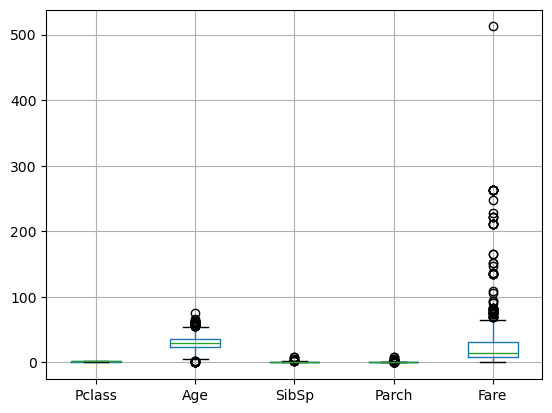

In [45]:
num.boxplot()
plt.show()

In [46]:
def outliercapping(num,col):
    q1=num[col].quantile(0.25)
    q3=num[col].quantile(0.75)
    IQR=q3-q1
    lower=q1 - 1.5*IQR
    upper=q3 + 1.5*IQR
    num[col]=num[col].apply(lambda x:upper if x > upper else lower if x < lower else x)
for col in num.select_dtypes(['int','float']).columns:
    outliercapping(num,col)

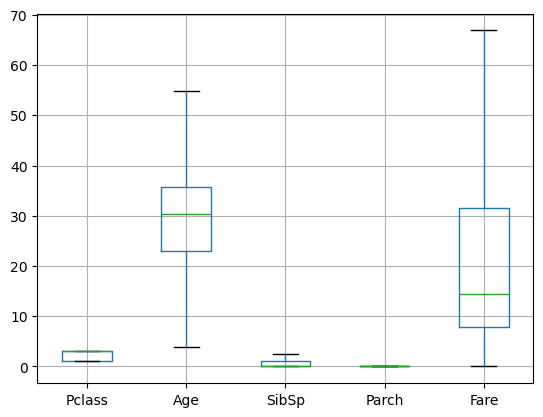

In [47]:
num.boxplot()
plt.show()

In [48]:
std=StandardScaler()
new_num=pd.DataFrame(std.fit_transform(num),columns=num.columns)
new_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.873482,0.382366,-0.622272,0.0,-0.796470
1,0.873482,1.451281,0.949387,0.0,-0.835607
2,-0.315819,2.124697,-0.622272,0.0,-0.708760
3,0.873482,-0.258983,-0.622272,0.0,-0.757139
4,0.873482,-0.686549,0.949387,0.0,-0.586042


In [49]:
features_test=pd.concat([new_cat,new_num],axis=1)
features_test

,Name,Sex,Ticket,Embarked,Pclass,Age,SibSp,Parch,Fare
0,206.0,1.0,152.0,1.0,0.873482,0.382366,-0.622272,0.0,-0.796470
1,403.0,0.0,221.0,2.0,0.873482,1.451281,0.949387,0.0,-0.835607
2,269.0,1.0,73.0,1.0,-0.315819,2.124697,-0.622272,0.0,-0.708760
3,408.0,1.0,147.0,2.0,0.873482,-0.258983,-0.622272,0.0,-0.757139
4,178.0,0.0,138.0,2.0,0.873482,-0.686549,0.949387,0.0,-0.586042
...,...,...,...,...,...,...,...,...,...
413,353.0,1.0,267.0,2.0,0.873482,0.020867,-0.622272,0.0,-0.786048
414,283.0,0.0,324.0,0.0,-1.505120,0.767175,-0.622272,0.0,1.991912
415,332.0,1.0,346.0,2.0,0.873482,0.724419,-0.622272,0.0,-0.823807
416,384.0,1.0,220.0,2.0,0.873482,0.020867,-0.622272,0.0,-0.786048
